# #Task 3 - Unsupervised Machine Learning¶

# Importing Libraries

In [2]:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

# Reading The Data

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Data Exploration

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
data.shape

(150, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [15]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [14]:

x = data.iloc[: , :-1].values  
y = data.iloc[: , -1].values  
print(x)
print(y)

[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.


# Visualizing The Data


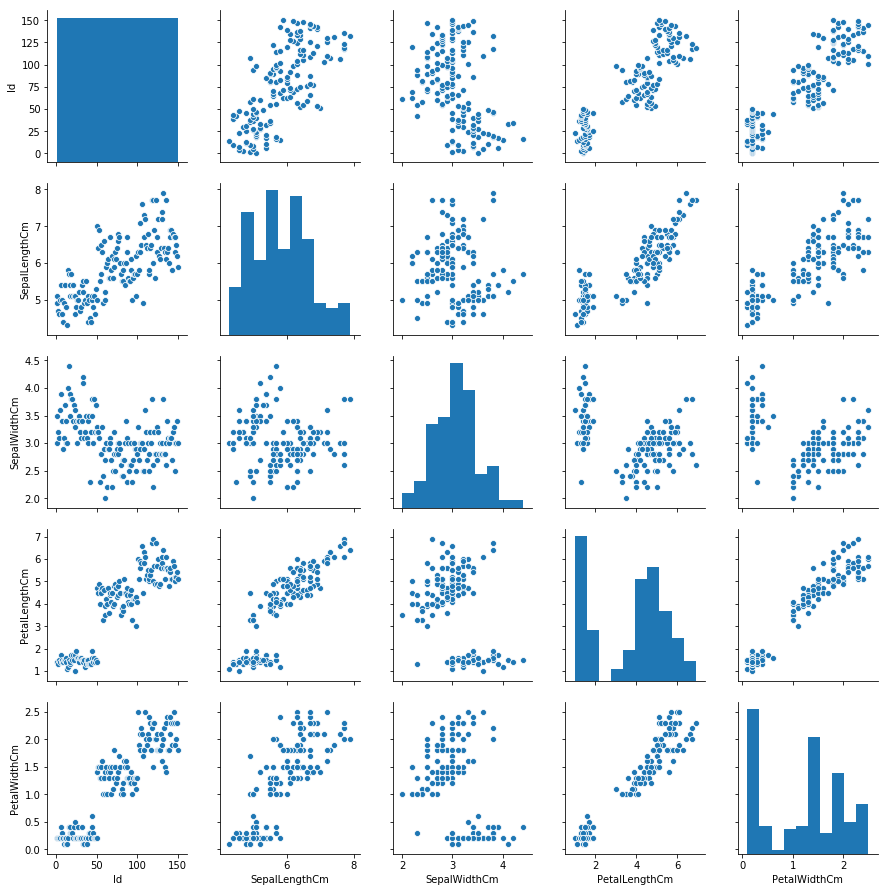

In [16]:
sns.pairplot(data)

Text(0.5, 1.0, 'SepalWidthCm vs SepalLengthCm')

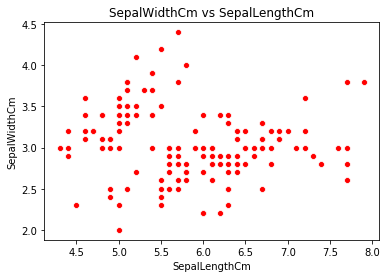

In [17]:
x = data["SepalLengthCm"]
y = data["SepalWidthCm"]
sns.scatterplot(x,y,color='red')
plt.title("SepalWidthCm vs SepalLengthCm")

Text(0.5, 1.0, 'PetalLengthCm vs PetalWidthCm')

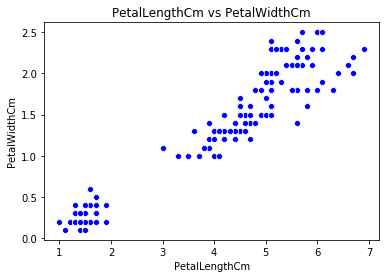

In [18]:

x = data["PetalLengthCm"]
y = data["PetalWidthCm"]
sns.scatterplot(x,y,color='blue')
plt.title("PetalLengthCm vs PetalWidthCm")


# Finding The Optimum Number of Clusters for k-means Classification

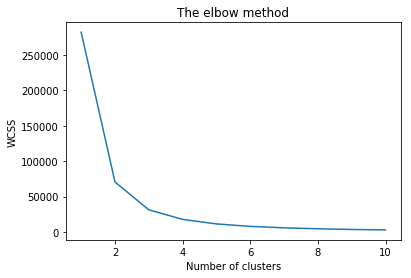

In [12]:

x = data.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Scattered plot of SepalLengthCm v/s Petal Length where the points are colored by the Species column

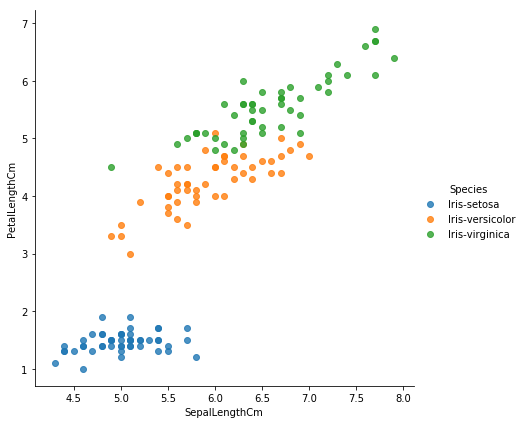

In [7]:
sns.lmplot('SepalLengthCm','PetalLengthCm',data=data, hue='Species',height=6,aspect=1,fit_reg=False)

Creating a stacked histogram showing Petal Length based on the Species column

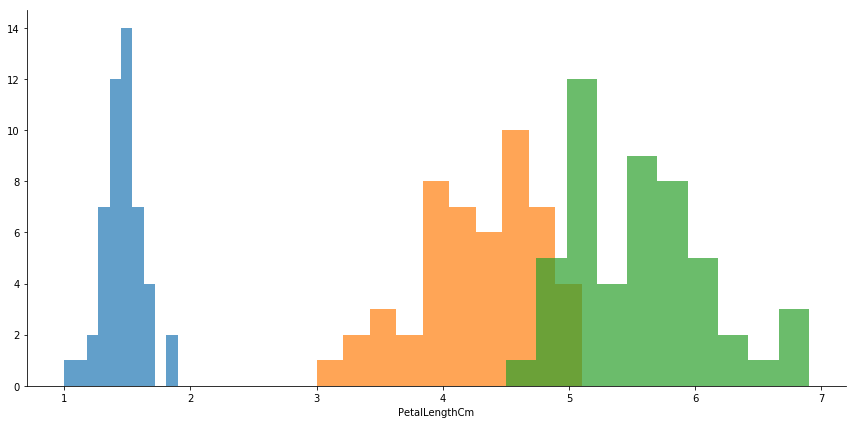

In [9]:
h = sns.FacetGrid(data,hue="Species",height=6,aspect=2)
h.map(plt.hist,'PetalLengthCm',alpha=0.7)

# Applying kmeans to The Dataset

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=101)
kmeans.fit(x)
y_means=kmeans.fit_predict(x)


# Visualising The Clusters

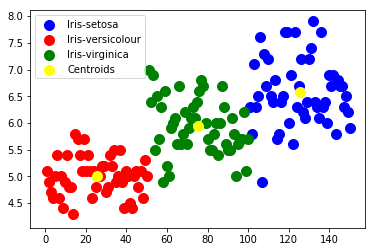

In [14]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Centroid of the Cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

(150, 6)